# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math

# sklearn for utilization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# modelling for ensemble method
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# visualization purpose
import matplotlib.pyplot as plt

# utils
import pickle
import random
import warnings
warnings.filterwarnings("ignore")

# import our ensemble stacking model here
from models.model_ensembles import EnsembleStacking

# import our genetic algorithm model here
from models.genetic_algorithm import GeneticAlgorithm

In [2]:
# for reproducecibility
random_state = 60251014
random.seed(random_state)

# Load Data After Preprocessing
***
Load data Breast Cancer Diagnosis and Breast Cancer Prognosis after cleaned and preprocessed

In [3]:
breast_cancer_preprocessed = pickle.load(open('../dataset/preprocessed_breast_cancer_data.pkl', 'rb'))

# diagnosis breast cancer dataset
diagnosis_X_train_original = breast_cancer_preprocessed['diagnosis']['original']['X_train']
diagnosis_X_train_downsampling = breast_cancer_preprocessed['diagnosis']['downsampling']['X_train']
diagnosis_X_train_upsampling = breast_cancer_preprocessed['diagnosis']['upsampling']['X_train']

diagnosis_y_train_original = breast_cancer_preprocessed['diagnosis']['original']['y_train']
diagnosis_y_train_downsampling = breast_cancer_preprocessed['diagnosis']['downsampling']['y_train']
diagnosis_y_train_upsampling = breast_cancer_preprocessed['diagnosis']['upsampling']['y_train']

diagnosis_X_test_original = breast_cancer_preprocessed['diagnosis']['original']['X_test']
diagnosis_y_test_original = breast_cancer_preprocessed['diagnosis']['original']['y_test']



# prognosis breast cancer dataset
prognosis_X_train_original = breast_cancer_preprocessed['prognosis']['original']['X_train']
prognosis_X_train_downsampling = breast_cancer_preprocessed['prognosis']['downsampling']['X_train']
prognosis_X_train_upsampling = breast_cancer_preprocessed['prognosis']['upsampling']['X_train']

prognosis_y_train_original = breast_cancer_preprocessed['prognosis']['original']['y_train']
prognosis_y_train_downsampling = breast_cancer_preprocessed['prognosis']['downsampling']['y_train']
prognosis_y_train_upsampling = breast_cancer_preprocessed['prognosis']['upsampling']['y_train']

prognosis_X_test_original = breast_cancer_preprocessed['prognosis']['original']['X_test']
prognosis_y_test_original = breast_cancer_preprocessed['prognosis']['original']['y_test']

# Defining Global Variables

In [4]:
kfold = StratifiedKFold(n_splits=5, random_state=45, shuffle=True)

# Genetic Algorithm global variables
number_of_chromosome = 45
maximum_generations = 30
crossover_rate = 0.85
mutation_rate = 0.01
convergence = 5

# Defining Global Functions

In [5]:
def create_new_input_features(ensemble_classifiers, X, y):
    all_predicted_results = dict()
    list_of_majority_voting_each_models = list()
    list_of_models = list()

    for model_name, models in ensemble_classifiers.items():
        # voting scenario for new data input prepration for ANN model
        if len(models)!=0:
            all_predicted_results[model_name] = dict()
            for sub_model_name, dict_models in models.items():
                all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X)

            # make dataframe for 5 model prediction results on X and get the mode label for that 5 prediction
            model_df_voting = pd.DataFrame(all_predicted_results[model_name]).mode(axis=1)[0]
            list_of_models.append('majority_vote_from_'+model_name)
            list_of_majority_voting_each_models.append(model_df_voting)
            
    new_input_features = pd.concat(list_of_majority_voting_each_models, axis=1)
    new_input_features.columns = list_of_models
    new_input_features['ground_truth'] = y.copy()
            
    return new_input_features

In [6]:
def print_model_experiment_results(name_of_scenario, y_test, y_pred):
    print('\t\t' + '='*30)
    print('\t\tHASIl UJI COBA {}'.format(name_of_scenario.upper()))
    print('\t\t' + '='*30)
    print("\tAkurasi Score: ", accuracy_score(y_test, y_pred))
    print("\tMacro Recall Score: ", recall_score(y_test, y_pred, average='macro'))
    print("\tMacro Precision Score: ", precision_score(y_test, y_pred, average='macro'))
    print("\tMacro F1-score Score: ", fbeta_score(y_test, y_pred, beta=1, average='macro'))
    print("\tMacro F2-score Score: ", fbeta_score(y_test, y_pred, beta=2, average='macro'))
    print("\tMacro F0.5-score Score: ", fbeta_score(y_test, y_pred, beta=0.5, average='macro'))
    
    print()
    print()
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(14,8))
    disp.plot()
    plt.show()

# Modelling Ensemble Classifiers for Diagnosis Breast Cancer using Genetic Optimization

## Without Data Sampling Method (Original)

### GA Optimization using Data without sampling

ITERASI KE 0 | BEST FITNESS = 0.9120410268954788
ITERASI KE 1 | BEST FITNESS = 0.9137390862562095
ITERASI KE 2 | BEST FITNESS = 0.9109898472912171
ITERASI KE 3 | BEST FITNESS = 0.9147950223292689
ITERASI KE 4 | BEST FITNESS = 0.9168315750079448
ITERASI KE 5 | BEST FITNESS = 0.9178589722682188
ITERASI KE 6 | BEST FITNESS = 0.9202657454797866
ITERASI KE 7 | BEST FITNESS = 0.9175212629835917
ITERASI KE 8 | BEST FITNESS = 0.9202562325421915
ITERASI KE 9 | BEST FITNESS = 0.914761727047686
ITERASI KE 10 | BEST FITNESS = 0.915813690685266
ITERASI KE 11 | BEST FITNESS = 0.9178684852058139
ITERASI KE 12 | BEST FITNESS = 0.9199375491327545
ITERASI KE 13 | BEST FITNESS = 0.9151137057387058
ITERASI KE 14 | BEST FITNESS = 0.9185676861190559
ITERASI KE 15 | BEST FITNESS = 0.9175212629835917
ITERASI KE 16 | BEST FITNESS = 0.915132731613896
ITERASI KE 17 | BEST FITNESS = 0.914771239985281
ITERASI KE 18 | BEST FITNESS = 0.9134013769715824
ITERASI KE 19 | BEST FITNESS = 0.9127307148711258
ITERASI KE 20 

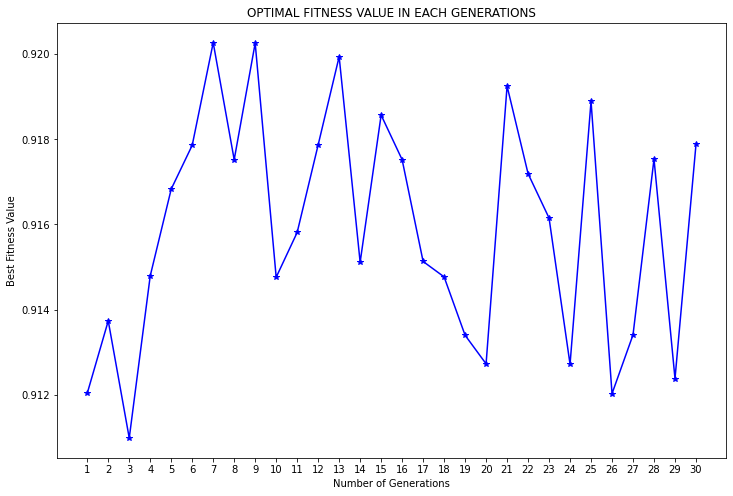

[[[2.0, 'linear', 'auto', 0.01],
  ['log_loss', 'random', None, 3, 2],
  ['none', 'newton-cg', 75, 1e-05],
  [(75, 75), 'identity', 'lbfgs', 1e-05, 128, 'constant', 0.001, 350]],
 0.9178779981434091]

In [7]:
ga_model_original = GeneticAlgorithm(
    X_train=diagnosis_X_train_original,
    y_train=diagnosis_y_train_original,
    kfold=kfold,
    number_of_chromosome=number_of_chromosome,
    maximum_generations=maximum_generations,
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    convergence=convergence
)
last_populations_original = ga_model_original.train()

# plot best fitness value in each generation
ga_model_original.plot_best_fitness_values()

# get the last generation for best solutions
best_hyperparams_genetic_algorithm_solution = last_populations_original[0]
best_hyperparams_svm = best_hyperparams_genetic_algorithm_solution[0][0]
best_hyperparams_dt = best_hyperparams_genetic_algorithm_solution[0][1]
best_hyperparams_logreg = best_hyperparams_genetic_algorithm_solution[0][2]
best_hyperparams_ann = best_hyperparams_genetic_algorithm_solution[0][3]

best_hyperparams_genetic_algorithm_solution

### Create Stacking ML Ensemble using 5-fold cross-validation

In [8]:
# create ensembles stacking method using GA hyperparameter optimized
genetic_algorithm_ensemble_classifiers_diagnosis_original = EnsembleStacking(
    diagnosis_X_train_original,
    diagnosis_y_train_original,
    diagnosis_X_test_original,
    diagnosis_y_test_original,
    kfold,
    svm_params={
        'C': best_hyperparams_svm[0],
        'kernel': best_hyperparams_svm[1],
        'gamma': best_hyperparams_svm[2],
        'tol': best_hyperparams_svm[3],
    },
    dt_params={
        'criterion': best_hyperparams_dt[0],
        'splitter': best_hyperparams_dt[1],
        'max_depth': best_hyperparams_dt[2],
        'min_samples_split': best_hyperparams_dt[3],
        'min_samples_leaf': best_hyperparams_dt[4],
    },
    logreg_params={
        'penalty': best_hyperparams_logreg[0],
        'solver': best_hyperparams_logreg[1],
        'max_iter': best_hyperparams_logreg[2],
        'tol': best_hyperparams_logreg[3],
    }
).train_ensemble()

In [9]:
# create dataframe for easy understanding from ensemble classifiers stacking results
genetic_algorithm_ensemble_classifiers_results_diagnosis_original = list()
for model in genetic_algorithm_ensemble_classifiers_diagnosis_original.keys():
    genetic_algorithm_ensemble_classifiers_results_diagnosis_original.append(
        pd.DataFrame(genetic_algorithm_ensemble_classifiers_diagnosis_original[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
genetic_algorithm_ensemble_classifiers_results_diagnosis_original = pd.concat(genetic_algorithm_ensemble_classifiers_results_diagnosis_original, axis=0)
genetic_algorithm_ensemble_classifiers_results_diagnosis_original

,train,training,validation,testing
model-3,"SVC(C=2.0, gamma='auto', kernel='linear', tol=...",0.93956,0.956044,0.95614
model-4,"SVC(C=2.0, gamma='auto', kernel='linear', tol=...",0.945055,0.912088,0.95614
model-5,"SVC(C=2.0, gamma='auto', kernel='linear', tol=...",0.934066,0.978022,0.95614
model-1,"SVC(C=2.0, gamma='auto', kernel='linear', tol=...",0.953297,0.923077,0.947368
model-2,"SVC(C=2.0, gamma='auto', kernel='linear', tol=...",0.945055,0.923077,0.947368
model-1,"LogisticRegression(max_iter=75, penalty='none'...",0.958791,0.923077,0.982456
model-4,"LogisticRegression(max_iter=75, penalty='none'...",0.967033,0.934066,0.973684
model-5,"LogisticRegression(max_iter=75, penalty='none'...",0.950549,0.967033,0.973684
model-3,"LogisticRegression(max_iter=75, penalty='none'...",0.964286,0.923077,0.95614
model-2,"LogisticRegression(max_iter=75, penalty='none'...",0.967033,0.912088,0.938596


### Create New Input Training from stacking ensemble ML

In [10]:
genetic_algorithm_new_input_training_features_diagnosis_original = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_original, 
    diagnosis_X_train_original,
    diagnosis_y_train_original
)

In [11]:
genetic_algorithm_new_input_training_features_diagnosis_original.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,0,0,0,0,0
1,1,1,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


### Feed New Input Features into ANN Model

In [12]:
# split X and y from new_input_features before feeding to ANN
new_X_train = genetic_algorithm_new_input_training_features_diagnosis_original.drop([
                                                                                    'ground_truth'], axis=1)
new_y_train = genetic_algorithm_new_input_training_features_diagnosis_original[
    'ground_truth']

# feed new X and new y into ANN
genetic_algorithm_ann_model_diagnosis_original = MLPClassifier(
    hidden_layer_sizes=best_hyperparams_ann[0],
    activation=best_hyperparams_ann[1],
    solver=best_hyperparams_ann[2],
    alpha=best_hyperparams_ann[3],
    batch_size=best_hyperparams_ann[4],
    learning_rate=best_hyperparams_ann[5],
    learning_rate_init=best_hyperparams_ann[6],
    max_iter=best_hyperparams_ann[7]
)
genetic_algorithm_ann_model_diagnosis_original.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_original = genetic_algorithm_ann_model_diagnosis_original.predict(
    new_X_train)

print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Original) = ",
      accuracy_score(new_y_train, predicted_ann_train_diagnosis_original))

Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Original) =  0.9824175824175824


## With Data Sampling Method (Upsampling)

### GA Optimization using Data with Upsampling

ITERASI KE 0 | BEST FITNESS = 0.9275262780697563
ITERASI KE 1 | BEST FITNESS = 0.9283444816053511
ITERASI KE 2 | BEST FITNESS = 0.9261616101290014
ITERASI KE 3 | BEST FITNESS = 0.9182781892021022
ITERASI KE 4 | BEST FITNESS = 0.9144798136645962
ITERASI KE 5 | BEST FITNESS = 0.9188216674629718
ITERASI KE 6 | BEST FITNESS = 0.916638795986622
ITERASI KE 7 | BEST FITNESS = 0.9185469421882465
ITERASI KE 8 | BEST FITNESS = 0.9182781892021022
ITERASI KE 9 | BEST FITNESS = 0.9139303631151456
ITERASI KE 10 | BEST FITNESS = 0.9144798136645962
ITERASI KE 11 | BEST FITNESS = 0.9185469421882465
ITERASI KE 12 | BEST FITNESS = 0.9188216674629718
ITERASI KE 13 | BEST FITNESS = 0.9144798136645962
ITERASI KE 14 | BEST FITNESS = 0.9169135212613473
ITERASI KE 15 | BEST FITNESS = 0.9166417821309125
ITERASI KE 16 | BEST FITNESS = 0.9171822742474915
ITERASI KE 17 | BEST FITNESS = 0.9188216674629718
ITERASI KE 18 | BEST FITNESS = 0.9144798136645962
ITERASI KE 19 | BEST FITNESS = 0.9166417821309125
ITERASI KE 

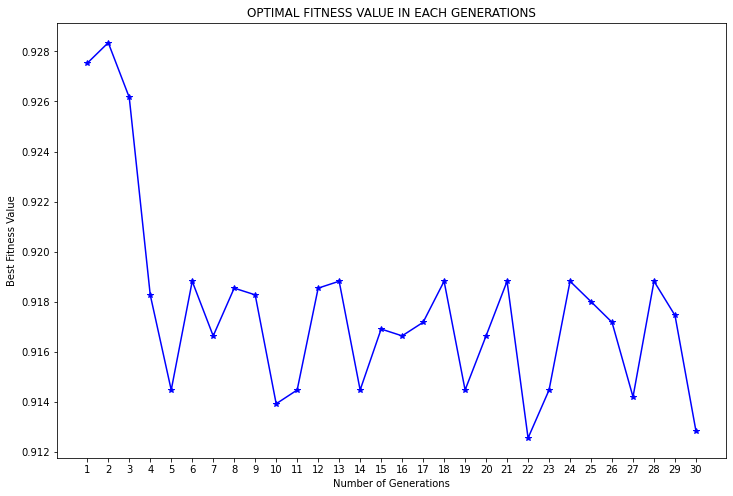

[[[2.0, 'sigmoid', 'auto', 0.1],
  ['entropy', 'best', 3, 4, 2],
  ['none', 'saga', 50, 1e-05],
  [75, 'logistic', 'lbfgs', 1e-05, 32, 'constant', 0.005, 250]],
 0.9128374343048256]

In [13]:
ga_model_upsampling = GeneticAlgorithm(
    X_train=diagnosis_X_train_upsampling,
    y_train=diagnosis_y_train_upsampling,
    kfold=kfold,
    number_of_chromosome=number_of_chromosome,
    maximum_generations=maximum_generations,
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    convergence=convergence
)
last_populations_upsampling = ga_model_upsampling.train()

# plot best fitness value in each generation
ga_model_upsampling.plot_best_fitness_values()

# get the last generation for best solutions
best_hyperparams_genetic_algorithm_solution = last_populations_upsampling[0]
best_hyperparams_svm = best_hyperparams_genetic_algorithm_solution[0][0]
best_hyperparams_dt = best_hyperparams_genetic_algorithm_solution[0][1]
best_hyperparams_logreg = best_hyperparams_genetic_algorithm_solution[0][2]
best_hyperparams_ann = best_hyperparams_genetic_algorithm_solution[0][3]

best_hyperparams_genetic_algorithm_solution

### Create Stacking ML Ensemble using 5-fold cross-validation

In [14]:
# create ensembles stacking method using GA hyperparameter optimized
genetic_algorithm_ensemble_classifiers_diagnosis_upsampling = EnsembleStacking(
    diagnosis_X_train_upsampling,
    diagnosis_y_train_upsampling,
    diagnosis_X_test_original,
    diagnosis_y_test_original,
    kfold,
    svm_params={
        'C': best_hyperparams_svm[0],
        'kernel': best_hyperparams_svm[1],
        'gamma': best_hyperparams_svm[2],
        'tol': best_hyperparams_svm[3],
    },
    dt_params={
        'criterion': best_hyperparams_dt[0],
        'splitter': best_hyperparams_dt[1],
        'max_depth': best_hyperparams_dt[2],
        'min_samples_split': best_hyperparams_dt[3],
        'min_samples_leaf': best_hyperparams_dt[4],
    },
    logreg_params={
        'penalty': best_hyperparams_logreg[0],
        'solver': best_hyperparams_logreg[1],
        'max_iter': best_hyperparams_logreg[2],
        'tol': best_hyperparams_logreg[3],
    }
).train_ensemble()

In [15]:
# create dataframe for easy understanding from ensemble classifiers stacking results
genetic_algorithm_ensemble_classifiers_results_diagnosis_upsampling = list()
for model in genetic_algorithm_ensemble_classifiers_diagnosis_upsampling.keys():
    genetic_algorithm_ensemble_classifiers_results_diagnosis_upsampling.append(pd.DataFrame(genetic_algorithm_ensemble_classifiers_diagnosis_upsampling[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
genetic_algorithm_ensemble_classifiers_results_diagnosis_upsampling = pd.concat(genetic_algorithm_ensemble_classifiers_results_diagnosis_upsampling, axis=0)
genetic_algorithm_ensemble_classifiers_results_diagnosis_upsampling

,train,training,validation,testing
model-1,"SVC(C=2.0, gamma='auto', kernel='sigmoid', tol...",0.925602,0.93913,0.95614
model-2,"SVC(C=2.0, gamma='auto', kernel='sigmoid', tol...",0.925602,0.930435,0.95614
model-3,"SVC(C=2.0, gamma='auto', kernel='sigmoid', tol...",0.925764,0.938596,0.95614
model-4,"SVC(C=2.0, gamma='auto', kernel='sigmoid', tol...",0.941048,0.929825,0.95614
model-5,"SVC(C=2.0, gamma='auto', kernel='sigmoid', tol...",0.938865,0.903509,0.95614
model-1,"LogisticRegression(max_iter=50, penalty='none'...",0.945295,0.93913,0.982456
model-3,"LogisticRegression(max_iter=50, penalty='none'...",0.938865,0.947368,0.982456
model-5,"LogisticRegression(max_iter=50, penalty='none'...",0.951965,0.929825,0.982456
model-2,"LogisticRegression(max_iter=50, penalty='none'...",0.949672,0.947826,0.973684
model-4,"LogisticRegression(max_iter=50, penalty='none'...",0.945415,0.947368,0.973684


### Create New Input Training from stacking ensemble ML

In [16]:
genetic_algorithm_new_input_training_features_diagnosis_upsampling = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_upsampling, 
    diagnosis_X_train_upsampling,
    diagnosis_y_train_upsampling
)

In [17]:
genetic_algorithm_new_input_training_features_diagnosis_upsampling.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,1,1,1,1,1
1,0,0,0,0,0
2,1,1,1,1,1
3,0,0,0,0,0
4,1,1,1,1,1


### Feed New Input Features into ANN Model

In [18]:
# split X and y from new_input_features before feeding to ANN
new_X_train = genetic_algorithm_new_input_training_features_diagnosis_upsampling.drop([
                                                                                    'ground_truth'], axis=1)
new_y_train = genetic_algorithm_new_input_training_features_diagnosis_upsampling[
    'ground_truth']

# feed new X and new y into ANN
genetic_algorithm_ann_model_diagnosis_upsampling = MLPClassifier(
    hidden_layer_sizes=best_hyperparams_ann[0],
    activation=best_hyperparams_ann[1],
    solver=best_hyperparams_ann[2],
    alpha=best_hyperparams_ann[3],
    batch_size=best_hyperparams_ann[4],
    learning_rate=best_hyperparams_ann[5],
    learning_rate_init=best_hyperparams_ann[6],
    max_iter=best_hyperparams_ann[7]
)
genetic_algorithm_ann_model_diagnosis_upsampling.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_upsampling = genetic_algorithm_ann_model_diagnosis_upsampling.predict(
    new_X_train)

print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Upsampling) = ",
      accuracy_score(new_y_train, predicted_ann_train_diagnosis_upsampling))

Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Upsampling) =  0.9772727272727273


## With Data Sampling Method (Downsampling)

### GA Optimization using data with Downsampling

ITERASI KE 0 | BEST FITNESS = 0.9187363834422657
ITERASI KE 1 | BEST FITNESS = 0.9081427015250545
ITERASI KE 2 | BEST FITNESS = 0.9219226579520697
ITERASI KE 3 | BEST FITNESS = 0.9172930283224401
ITERASI KE 4 | BEST FITNESS = 0.9099400871459695
ITERASI KE 5 | BEST FITNESS = 0.9108660130718954
ITERASI KE 6 | BEST FITNESS = 0.9182189542483661
ITERASI KE 7 | BEST FITNESS = 0.9172930283224401
ITERASI KE 8 | BEST FITNESS = 0.9182189542483661
ITERASI KE 9 | BEST FITNESS = 0.8961601307189542
ITERASI KE 10 | BEST FITNESS = 0.9172930283224401
ITERASI KE 11 | BEST FITNESS = 0.9099400871459695
ITERASI KE 12 | BEST FITNESS = 0.9172930283224401
ITERASI KE 13 | BEST FITNESS = 0.9099400871459695
ITERASI KE 14 | BEST FITNESS = 0.9182189542483661
ITERASI KE 15 | BEST FITNESS = 0.9108660130718954
ITERASI KE 16 | BEST FITNESS = 0.9099400871459695
ITERASI KE 17 | BEST FITNESS = 0.9172930283224401
ITERASI KE 18 | BEST FITNESS = 0.9099400871459695
ITERASI KE 19 | BEST FITNESS = 0.9182189542483661
ITERASI KE

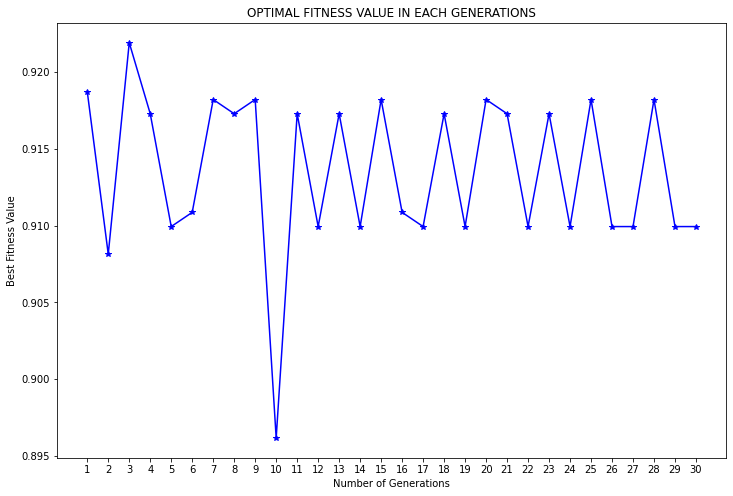

[[[1.2, 'rbf', 'auto', 0.01],
  ['gini', 'best', 2, 4, 2],
  ['l2', 'lbfgs', 100, 0.0001],
  [(75, 75), 'identity', 'sgd', 0.001, 128, 'constant', 0.004, 200]],
 0.9099400871459695]

In [19]:
ga_model_downsampling = GeneticAlgorithm(
    X_train=diagnosis_X_train_downsampling,
    y_train=diagnosis_y_train_downsampling,
    kfold=kfold,
    number_of_chromosome=number_of_chromosome,
    maximum_generations=maximum_generations,
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    convergence=convergence
)
last_populations_downsampling = ga_model_downsampling.train()

# plot best fitness value in each generation
ga_model_downsampling.plot_best_fitness_values()

# get the last generation for best solutions
best_hyperparams_genetic_algorithm_solution = last_populations_downsampling[0]
best_hyperparams_svm = best_hyperparams_genetic_algorithm_solution[0][0]
best_hyperparams_dt = best_hyperparams_genetic_algorithm_solution[0][1]
best_hyperparams_logreg = best_hyperparams_genetic_algorithm_solution[0][2]
best_hyperparams_ann = best_hyperparams_genetic_algorithm_solution[0][3]

best_hyperparams_genetic_algorithm_solution

### Create Stacking ML Ensemble using 5-fold cross-validation

In [20]:
# create ensembles stacking method using GA hyperparameter optimized
genetic_algorithm_ensemble_classifiers_diagnosis_downsampling = EnsembleStacking(
    diagnosis_X_train_downsampling,
    diagnosis_y_train_downsampling,
    diagnosis_X_test_original,
    diagnosis_y_test_original,
    kfold,
    svm_params={
        'C': best_hyperparams_svm[0],
        'kernel': best_hyperparams_svm[1],
        'gamma': best_hyperparams_svm[2],
        'tol': best_hyperparams_svm[3],
    },
    dt_params={
        'criterion': best_hyperparams_dt[0],
        'splitter': best_hyperparams_dt[1],
        'max_depth': best_hyperparams_dt[2],
        'min_samples_split': best_hyperparams_dt[3],
        'min_samples_leaf': best_hyperparams_dt[4],
    },
    logreg_params={
        'penalty': best_hyperparams_logreg[0],
        'solver': best_hyperparams_logreg[1],
        'max_iter': best_hyperparams_logreg[2],
        'tol': best_hyperparams_logreg[3],
    }
).train_ensemble()

In [21]:
# create dataframe for easy understanding from ensemble classifiers stacking results
genetic_algorithm_ensemble_classifiers_results_diagnosis_downsampling = list()
for model in genetic_algorithm_ensemble_classifiers_diagnosis_downsampling.keys():
    genetic_algorithm_ensemble_classifiers_results_diagnosis_downsampling.append(pd.DataFrame(genetic_algorithm_ensemble_classifiers_diagnosis_downsampling[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
genetic_algorithm_ensemble_classifiers_results_diagnosis_downsampling = pd.concat(genetic_algorithm_ensemble_classifiers_results_diagnosis_downsampling, axis=0)
genetic_algorithm_ensemble_classifiers_results_diagnosis_downsampling

,train,training,validation,testing
model-1,"SVC(C=1.2, gamma='auto', tol=0.01)",0.914815,0.941176,0.95614
model-2,"SVC(C=1.2, gamma='auto', tol=0.01)",0.918519,0.941176,0.95614
model-3,"SVC(C=1.2, gamma='auto', tol=0.01)",0.918519,0.911765,0.95614
model-4,"SVC(C=1.2, gamma='auto', tol=0.01)",0.922509,0.910448,0.95614
model-5,"SVC(C=1.2, gamma='auto', tol=0.01)",0.929889,0.880597,0.95614
model-2,LogisticRegression(),0.922222,0.941176,0.964912
model-1,LogisticRegression(),0.925926,0.926471,0.95614
model-3,LogisticRegression(),0.911111,0.941176,0.95614
model-4,LogisticRegression(),0.926199,0.910448,0.95614
model-5,LogisticRegression(),0.926199,0.880597,0.95614


### Create New Input Training from stacking ensemble ML

In [22]:
genetic_algorithm_new_input_training_features_diagnosis_downsampling = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_downsampling, 
    diagnosis_X_train_downsampling,
    diagnosis_y_train_downsampling
)

In [23]:
genetic_algorithm_new_input_training_features_diagnosis_downsampling.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,0,0,0,0,0
1,1,1,0,0,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


### Feed New Input Features into ANN Model

In [24]:
# split X and y from new_input_features before feeding to ANN
new_X_train = genetic_algorithm_new_input_training_features_diagnosis_downsampling.drop([
                                                                                    'ground_truth'], axis=1)
new_y_train = genetic_algorithm_new_input_training_features_diagnosis_downsampling[
    'ground_truth']

# feed new X and new y into ANN
genetic_algorithm_ann_model_diagnosis_downsampling = MLPClassifier(
    hidden_layer_sizes=best_hyperparams_ann[0],
    activation=best_hyperparams_ann[1],
    solver=best_hyperparams_ann[2],
    alpha=best_hyperparams_ann[3],
    batch_size=best_hyperparams_ann[4],
    learning_rate=best_hyperparams_ann[5],
    learning_rate_init=best_hyperparams_ann[6],
    max_iter=best_hyperparams_ann[7]
)
genetic_algorithm_ann_model_diagnosis_downsampling.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_downsampling = genetic_algorithm_ann_model_diagnosis_downsampling.predict(
    new_X_train)

print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) = ",
      accuracy_score(new_y_train, predicted_ann_train_diagnosis_downsampling))

Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) =  0.9467455621301775


# Modelling Ensemble Classifiers for Diagnosis Breast Cancer Dataset (Default Hyperparameters)

## Without Data Sampling Method (Original)

### Create Stacking ML Ensemble using 5-fold cross-validation

In [25]:
ensemble_classifiers_diagnosis_original = EnsembleStacking(
    diagnosis_X_train_original, 
    diagnosis_y_train_original, 
    diagnosis_X_test_original, 
    diagnosis_y_test_original, 
    kfold).train_ensemble()

In [26]:
# create dataframe for easy understanding from ensemble classifiers stacking results
ensemble_classifiers_results_diagnosis_original = list()
for model in ensemble_classifiers_diagnosis_original.keys():
    ensemble_classifiers_results_diagnosis_original.append(pd.DataFrame(ensemble_classifiers_diagnosis_original[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
ensemble_classifiers_results_diagnosis_original = pd.concat(ensemble_classifiers_results_diagnosis_original, axis=0)
ensemble_classifiers_results_diagnosis_original

,train,training,validation,testing
model-5,SVC(),0.950549,0.978022,0.964912
model-1,SVC(),0.964286,0.901099,0.95614
model-2,SVC(),0.947802,0.912088,0.95614
model-3,SVC(),0.947802,0.956044,0.95614
model-4,SVC(),0.958791,0.945055,0.95614
model-1,LogisticRegression(),0.945055,0.912088,0.95614
model-2,LogisticRegression(),0.945055,0.912088,0.95614
model-3,LogisticRegression(),0.934066,0.945055,0.95614
model-4,LogisticRegression(),0.942308,0.934066,0.95614
model-5,LogisticRegression(),0.928571,0.978022,0.95614


### Create New Input Training from stacking ensemble ML

In [27]:
new_input_training_features_diagnosis_original = create_new_input_features(
    ensemble_classifiers_diagnosis_original, 
    diagnosis_X_train_original,
    diagnosis_y_train_original
)

In [28]:
new_input_training_features_diagnosis_original.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,0,0,0,0,0
1,1,1,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


### Feed New Input Features into ANN Model

In [29]:
# split X and y from new_input_features before feeding to ANN
new_X_train = new_input_training_features_diagnosis_original.drop(['ground_truth'],axis=1)
new_y_train = new_input_training_features_diagnosis_original['ground_truth']

# feed new X and new y into ANN
ann_model_diagnosis_original = MLPClassifier()
ann_model_diagnosis_original.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_original = ann_model_diagnosis_original.predict(new_X_train)
predicted_ann_train_diagnosis_original = ann_model_diagnosis_original.predict(new_X_train)


print()
print()
print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Original) = ", accuracy_score(new_y_train, predicted_ann_train_diagnosis_original))



Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Original) =  1.0


## With Data Sampling Method (Upsampling)

### Create Stacking ML Ensemble using 5-fold cross-validation

In [30]:
ensemble_classifiers_diagnosis_upsampling = EnsembleStacking(
    diagnosis_X_train_upsampling, 
    diagnosis_y_train_upsampling, 
    diagnosis_X_test_original, 
    diagnosis_y_test_original, 
    kfold).train_ensemble()

In [31]:
# create dataframe for easy understanding from ensemble classifiers stacking results
ensemble_classifiers_results_diagnosis_upsampling = list()
for model in ensemble_classifiers_diagnosis_upsampling.keys():
    ensemble_classifiers_results_diagnosis_upsampling.append(pd.DataFrame(ensemble_classifiers_diagnosis_upsampling[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
ensemble_classifiers_results_diagnosis_upsampling = pd.concat(ensemble_classifiers_results_diagnosis_upsampling, axis=0)
ensemble_classifiers_results_diagnosis_upsampling

,train,training,validation,testing
model-1,SVC(),0.958425,0.930435,0.973684
model-3,SVC(),0.943231,0.938596,0.964912
model-5,SVC(),0.958515,0.912281,0.964912
model-2,SVC(),0.95186,0.965217,0.95614
model-4,SVC(),0.949782,0.964912,0.947368
model-1,LogisticRegression(),0.932166,0.947826,0.964912
model-2,LogisticRegression(),0.934354,0.930435,0.95614
model-3,LogisticRegression(),0.936681,0.929825,0.95614
model-4,LogisticRegression(),0.934498,0.947368,0.95614
model-5,LogisticRegression(),0.941048,0.912281,0.95614


### Create New Input Training from stacking ensemble ML

In [32]:
new_input_training_features_diagnosis_upsampling = create_new_input_features(
    ensemble_classifiers_diagnosis_upsampling, 
    diagnosis_X_train_upsampling,
    diagnosis_y_train_upsampling
)

In [33]:
new_input_training_features_diagnosis_upsampling.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,1,1,1,1,1
1,0,0,0,0,0
2,1,1,1,1,1
3,0,0,0,0,0
4,1,1,1,1,1


### Feed New Input Features into ANN Model

In [34]:
# split X and y from new_input_features before feeding to ANN
new_X_train = new_input_training_features_diagnosis_upsampling.drop(['ground_truth'],axis=1)
new_y_train = new_input_training_features_diagnosis_upsampling['ground_truth']

# feed new X and new y into ANN
ann_model_diagnosis_upsampling = MLPClassifier()
ann_model_diagnosis_upsampling.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_upsampling = ann_model_diagnosis_upsampling.predict(new_X_train)
predicted_ann_train_diagnosis_upsampling = ann_model_diagnosis_upsampling.predict(new_X_train)


print()
print()
print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) = ", accuracy_score(new_y_train, predicted_ann_train_diagnosis_upsampling))



Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) =  1.0


## With Data Sampling Method (Downsampling)

### Create Stacking ML Ensemble using 5-fold cross-validation

In [35]:
ensemble_classifiers_diagnosis_downsampling = EnsembleStacking(
    diagnosis_X_train_downsampling, 
    diagnosis_y_train_downsampling, 
    diagnosis_X_test_original, 
    diagnosis_y_test_original, 
    kfold).train_ensemble()

In [36]:
# create dataframe for easy understanding from ensemble classifiers stacking results
ensemble_classifiers_results_diagnosis_downsampling = list()
for model in ensemble_classifiers_diagnosis_downsampling.keys():
    ensemble_classifiers_results_diagnosis_downsampling.append(pd.DataFrame(ensemble_classifiers_diagnosis_downsampling[model]).transpose().sort_values(by=['testing'], ascending=False))

# concat all dataframe results
ensemble_classifiers_results_diagnosis_downsampling = pd.concat(ensemble_classifiers_results_diagnosis_downsampling, axis=0)
ensemble_classifiers_results_diagnosis_downsampling

,train,training,validation,testing
model-1,SVC(),0.933333,0.926471,0.982456
model-2,SVC(),0.948148,0.897059,0.982456
model-3,SVC(),0.937037,0.955882,0.95614
model-4,SVC(),0.933579,0.895522,0.95614
model-5,SVC(),0.944649,0.895522,0.95614
model-2,LogisticRegression(),0.922222,0.941176,0.964912
model-1,LogisticRegression(),0.925926,0.926471,0.95614
model-3,LogisticRegression(),0.911111,0.941176,0.95614
model-4,LogisticRegression(),0.926199,0.910448,0.95614
model-5,LogisticRegression(),0.926199,0.880597,0.95614


### Create New Input Training from stacking ensemble ML

In [37]:
new_input_training_features_diagnosis_downsampling = create_new_input_features(
    ensemble_classifiers_diagnosis_downsampling, 
    diagnosis_X_train_downsampling,
    diagnosis_y_train_downsampling
)

In [38]:
new_input_training_features_diagnosis_downsampling.head()

,majority_vote_from_svm,majority_vote_from_logreg,majority_vote_from_naive_bayes,majority_vote_from_decision_tree,ground_truth
0,0,0,0,0,0
1,1,1,0,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


### Feed New Input Features into ANN Model

In [39]:
# split X and y from new_input_features before feeding to ANN
new_X_train = new_input_training_features_diagnosis_downsampling.drop(['ground_truth'],axis=1)
new_y_train = new_input_training_features_diagnosis_downsampling['ground_truth']

# feed new X and new y into ANN
ann_model_diagnosis_downsampling = MLPClassifier()
ann_model_diagnosis_downsampling.fit(new_X_train, new_y_train)
predicted_ann_train_diagnosis_downsampling = ann_model_diagnosis_downsampling.predict(new_X_train)
predicted_ann_train_diagnosis_downsampling = ann_model_diagnosis_downsampling.predict(new_X_train)


print()
print()
print("Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) = ", accuracy_score(new_y_train, predicted_ann_train_diagnosis_downsampling))



Final Accuracy Score [Mls Ensembles + ANN] on Training Diagnostic Dataset (Downsampling) =  1.0


# Testing Results

## Without Data Sampling Method (Original) 

### GA combine Ensemble stacking ML - ANN

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [40]:
genetic_algorithm_new_input_testing_features_diagnosis_original = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_original, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (ORIGINAL) + GENETIC ALGORITHM 
	Akurasi Score:  0.956140350877193
	Macro Recall Score:  0.9510317720275139
	Macro Precision Score:  0.9553571428571428
	Macro F1-score Score:  0.9531057178116
	Macro F2-score Score:  0.9518402814239212
	Macro F0.5-score Score:  0.9544350420467598


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1008x576 with 0 Axes>

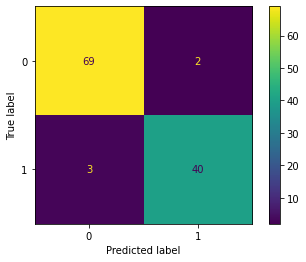

In [41]:
# split X and y from new_input_features before feeding to ANN
new_X_test = genetic_algorithm_new_input_testing_features_diagnosis_original.drop(['ground_truth'],axis=1)
new_y_test = genetic_algorithm_new_input_testing_features_diagnosis_original['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_original = genetic_algorithm_ann_model_diagnosis_original.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Original) + Genetic Algorithm ', new_y_test, predicted_test_original)

### Ensemble stacking ML - ANN (without GA)

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [42]:
new_input_testing_features_diagnosis_original = create_new_input_features(
    ensemble_classifiers_diagnosis_original, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (ORIGINAL)
	Akurasi Score:  0.956140350877193
	Macro Recall Score:  0.9510317720275139
	Macro Precision Score:  0.9553571428571428
	Macro F1-score Score:  0.9531057178116
	Macro F2-score Score:  0.9518402814239212
	Macro F0.5-score Score:  0.9544350420467598


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1008x576 with 0 Axes>

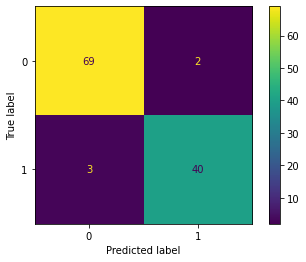

In [43]:
# split X and y from new_input_features before feeding to ANN
new_X_test = new_input_testing_features_diagnosis_original.drop(['ground_truth'],axis=1)
new_y_test = new_input_testing_features_diagnosis_original['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_original = ann_model_diagnosis_original.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Original)', new_y_test, predicted_test_original)

## With Data Sampling Method (Upsampling)

### GA combine Ensemble stacking ML - ANN

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [44]:
genetic_algorithm_new_input_testing_features_diagnosis_upsampling = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_upsampling, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (UPSAMPLING) + GENETIC ALGORITHM
	Akurasi Score:  0.9385964912280702
	Macro Recall Score:  0.9277759580740256
	Macro Precision Score:  0.9412162162162162
	Macro F1-score Score:  0.933693394266722
	Macro F2-score Score:  0.9299567829661644
	Macro F0.5-score Score:  0.9380075435229058


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<Figure size 1008x576 with 0 Axes>

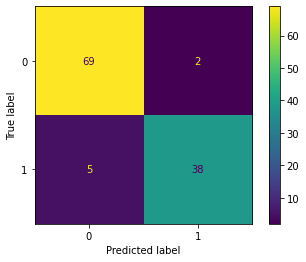

In [45]:
# split X and y from new_input_features before feeding to ANN
new_X_test = genetic_algorithm_new_input_testing_features_diagnosis_upsampling.drop(['ground_truth'],axis=1)
new_y_test = genetic_algorithm_new_input_testing_features_diagnosis_upsampling['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_upsampling = genetic_algorithm_ann_model_diagnosis_upsampling.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Upsampling) + Genetic Algorithm', new_y_test, predicted_test_upsampling)

### Ensemble stacking ML - ANN (without GA)

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [46]:
new_input_testing_features_diagnosis_upsampling = create_new_input_features(
    ensemble_classifiers_diagnosis_upsampling, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (UPSAMPLING)
	Akurasi Score:  0.9298245614035088
	Macro Recall Score:  0.9299050114641336
	Macro Precision Score:  0.9227053140096618
	Macro F1-score Score:  0.925974025974026
	Macro F2-score Score:  0.9282515894048382
	Macro F0.5-score Score:  0.9239348160401133


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



<Figure size 1008x576 with 0 Axes>

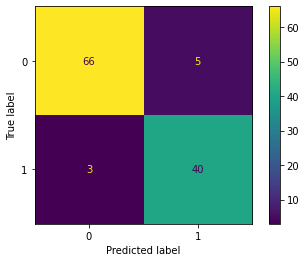

In [47]:
# split X and y from new_input_features before feeding to ANN
new_X_test = new_input_testing_features_diagnosis_upsampling.drop(['ground_truth'],axis=1)
new_y_test = new_input_testing_features_diagnosis_upsampling['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_upsampling = ann_model_diagnosis_upsampling.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Upsampling)', new_y_test, predicted_test_upsampling)

## With Data Sampling Method (Downsampling)

### GA combine Ensemble stacking ML - ANN

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [48]:
genetic_algorithm_new_input_testing_features_diagnosis_downsampling = create_new_input_features(
    genetic_algorithm_ensemble_classifiers_diagnosis_downsampling, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (DOWNSAMPLING) + GENETIC ALGORITHM
	Akurasi Score:  0.9736842105263158
	Macro Recall Score:  0.9697019325253848
	Macro Precision Score:  0.9742063492063492
	Macro F1-score Score:  0.97186343068696
	Macro F2-score Score:  0.9705449963246875
	Macro F0.5-score Score:  0.9732471715798228


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 1008x576 with 0 Axes>

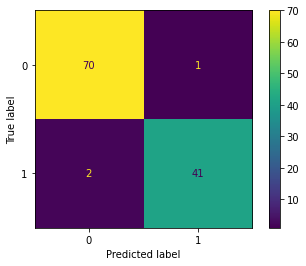

In [49]:
# split X and y from new_input_features before feeding to ANN
new_X_test = genetic_algorithm_new_input_testing_features_diagnosis_downsampling.drop(['ground_truth'],axis=1)
new_y_test = genetic_algorithm_new_input_testing_features_diagnosis_downsampling['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_downsampling = genetic_algorithm_ann_model_diagnosis_downsampling.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Downsampling) + Genetic Algorithm', new_y_test, predicted_test_downsampling)

### Ensemble stacking ML - ANN (without GA)

#### Create New Input Features from stacking ensemble ML before ANN process for preparing testing data new input features

In [50]:
new_input_testing_features_diagnosis_downsampling = create_new_input_features(
    ensemble_classifiers_diagnosis_downsampling, 
    diagnosis_X_test_original,
    diagnosis_y_test_original
)

#### Feed new testing input features into ANN pre-trained model

		HASIl UJI COBA HASIL PENGUJIAN DATA TESTING DIAGNOSIS BREAST CANCER (DOWNSAMPLING)
	Akurasi Score:  0.9298245614035088
	Macro Recall Score:  0.9253193580085162
	Macro Precision Score:  0.9253193580085162
	Macro F1-score Score:  0.9253193580085162
	Macro F2-score Score:  0.9253193580085162
	Macro F0.5-score Score:  0.9253193580085162


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



<Figure size 1008x576 with 0 Axes>

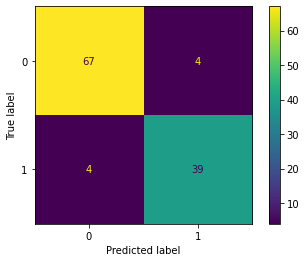

In [51]:
# split X and y from new_input_features before feeding to ANN
new_X_test = new_input_testing_features_diagnosis_downsampling.drop(['ground_truth'],axis=1)
new_y_test = new_input_testing_features_diagnosis_downsampling['ground_truth']

# predict new X test using pre-trained ANN before
predicted_test_downsampling = ann_model_diagnosis_downsampling.predict(new_X_test)

# print testing results
print_model_experiment_results('Hasil Pengujian Data Testing Diagnosis Breast Cancer (Downsampling)', new_y_test, predicted_test_downsampling)